Dataset: Data for Admission in the University

Data source: Kaggle

Short description: 

A dataset with information on applicants' Graduate Record Examination (GRE) scores, Test of English as a Foreign Language (TOEFL) scores, university ratings, statement of purpose (SOP) strength, letter of recommendation (LOR) strength, CGPA, research experience, and their chance of admission.

Based on the variables, the data is drawn from international applicants who have finished their undergraduate studies and wish to pursue a postgraduate (e.g. MA or MSc) degree at a US university.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import csv file

df = pd.read_csv("/Users/andreakoko/Downloads/adm_data.csv")

Questions: 
1. What factors are most associated with chance of admission based on the data available? 
    
    Answer: In order, CGPA (cumulative grade point average), GRE score and TOEFL score. 

2. What scores should students aim to achieve in GRE, TOEFL and CPGA scores to get > 0.7 chance of admission?
   
   Answer: They should aim to achieve a GRE score of 323 (sd=8.7), a TOEFL score of 110 (sd=4.9), and a CGPA score of 8.9 (sd=0.4).

3. Is it important to have research experience?

    Answer: Of all the factors considered, research experience is the least associated with chance of admission, however, it is still positively correlated with chance of admission (r=0.55), and for those with over 70% chance of being admitted, 75% of those students have had research experience.

### Data inspection

In [3]:
# Inspect the first 10 rows of the dataset

print(df.head(10))

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   
5           6        330          115                  5  4.5   3.0  9.34   
6           7        321          109                  3  3.0   4.0  8.20   
7           8        308          101                  2  3.0   4.0  7.90   
8           9        302          102                  1  2.0   1.5  8.00   
9          10        323          108                  3  3.5   3.0  8.60   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1             

In [4]:
# Inspect the last 10 rows of the dataset

print(df.tail(10))

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
390         391        314          102                  2  2.0   2.5  8.24   
391         392        318          106                  3  2.0   3.0  8.65   
392         393        326          112                  4  4.0   3.5  9.12   
393         394        317          104                  2  3.0   3.0  8.76   
394         395        329          111                  4  4.5   4.0  9.23   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
390         0              0.64  
391         0              0.71  
392         1              0

In [5]:
# Inspect a random sample of the dataset

print(df.sample(10))

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
8             9        302          102                  1  2.0   1.5  8.00   
264         265        325          110                  2  3.0   2.5  8.76   
80           81        312          105                  3  2.0   3.0  8.02   
318         319        324          111                  3  2.5   2.0  8.80   
236         237        325          112                  4  4.0   4.5  9.17   
107         108        338          117                  4  3.5   4.5  9.46   
211         212        328          110                  4  5.0   4.0  9.14   
35           36        320          110                  5  5.0   5.0  9.20   
26           27        322          109                  5  4.5   3.5  8.80   
104         105        326          112                  3  3.5   3.0  9.05   

     Research  Chance of Admit   
8           0              0.50  
264         1              0.75  
80          1              0

In [6]:
# Check the dimensions of the dataset

df.shape

(400, 9)

In [7]:
# There are 400 rows and 9 columns

# Check dataset information (dimension, data types, NaNs)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


In [8]:
# GRE Score, TOEFL Score = numerical (discrete)
# SOP, LOR, CGPA, Chance of Admit = numerical (continous)

# Change dtypes? : 
# University Rating = currently integer, but could be changed to categorical (ordinal; 1 < 2 < 3 < 4 < 5)
# Research = currently integer, but could be changed to boolean; 0 = no, 1 = yes

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
# Check for duplicates

df.duplicated().sum()

0

In [11]:
# Check for missing values

df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Univariate analysis

In [12]:
# Starting with categorical variables
# Let's see how many students have research experience and how many do not

df["Research"].value_counts()

1    219
0    181
Name: Research, dtype: int64

In [13]:
df["Research"].value_counts(normalize=True)

1    0.5475
0    0.4525
Name: Research, dtype: float64

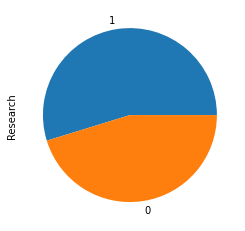

In [14]:
df["Research"].value_counts().plot.pie()
plt.show()
plt.close()

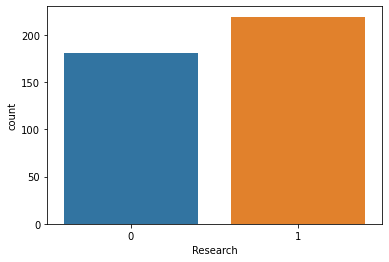

In [15]:
sns.countplot(data=df, x="Research")
plt.show()
plt.close()

In [16]:
df["University Rating"].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

In [17]:
df["University Rating"].value_counts(normalize=True)

3    0.3325
2    0.2675
4    0.1850
5    0.1500
1    0.0650
Name: University Rating, dtype: float64

In [18]:
# University Rating is a categorical variable (1-5 ranking), so should use bar chart or pie chart instead!
#sns.histplot(data=df, x="University Rating", bins=5)
#plt.xticks(range(1,6))
#plt.show()

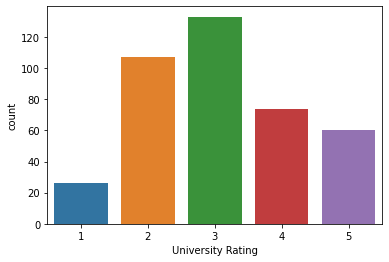

In [19]:
sns.countplot(x="University Rating", data=df)
plt.show()
plt.close()

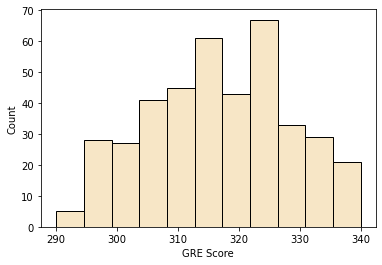

The mean value is: 316.8075
The median value is: 317.0
The standard deviation is: 11.473646113500477


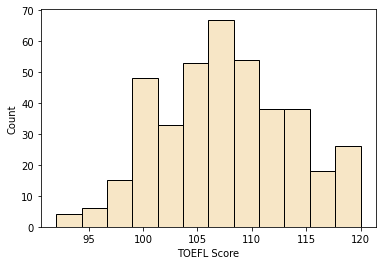

The mean value is: 107.41
The median value is: 107.0
The standard deviation is: 6.069513777374129


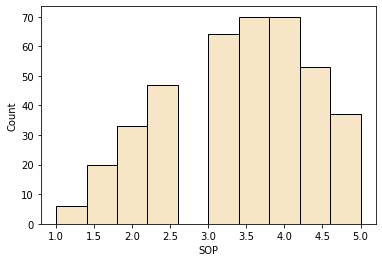

The mean value is: 3.4
The median value is: 3.5
The standard deviation is: 1.0068686414586976


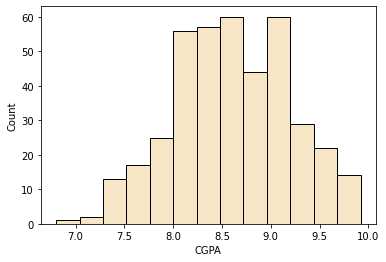

The mean value is: 8.598924999999998
The median value is: 8.61
The standard deviation is: 0.5963170964964317


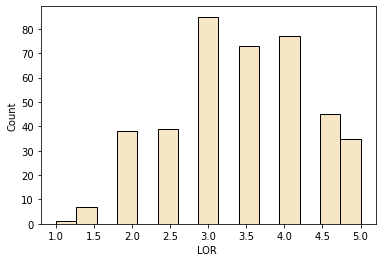

The mean value is: 3.4525
The median value is: 3.5
The standard deviation is: 0.898477548279256


In [20]:
def basic_analysis(columns):
    for col in columns:
        plt.clf()
        sns.histplot(col, color="wheat")
        plt.show()
        print("The mean value is: " + str(col.mean()))
        print("The median value is: " + str(col.median()))
        print("The standard deviation is: " + str(col.std()))


basic_analysis([df["GRE Score"], df["TOEFL Score"], df["SOP"], df["CGPA"], df["LOR "]])
    

Bivariate & Multivariate analysis

In [21]:
# Generate correlation matrix to inspect potential relationships between variables

df_corr = df.corr()
df_corr

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


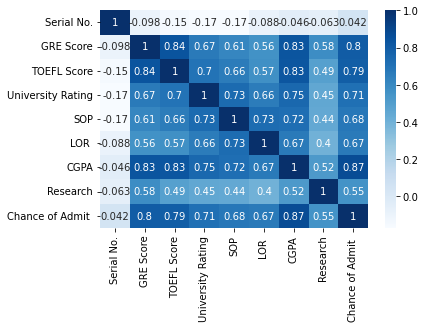

In [22]:
# Heatmap

sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

In [23]:
# Does research experience play a role? And if so how much of a role does it play?
# Calculate the mean difference

research_admit = df.groupby("Research")["Chance of Admit "].mean().reset_index()
print(research_admit)

   Research  Chance of Admit 
0         0          0.637680
1         1          0.795982


In [24]:
research_admit_mean_diff = research_admit.iloc[1, 1] - research_admit.iloc[0, 1]
print(research_admit_mean_diff)

0.1583021771487676


In [25]:
# Subset of data with only those who have research experience

research_yes = df[df["Research"] == 1]
research_yes.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.0,219.000000
mean,193.872146,322.853881,110.109589,3.552511,3.805936,3.776256,8.881370,1.0,0.795982
std,117.821557,9.808563,5.646859,1.075469,0.851341,0.824055,0.542563,0.0,0.123051
min,1.000000,293.000000,95.000000,1.000000,1.000000,1.500000,6.800000,1.0,0.360000
25%,90.500000,317.000000,107.000000,3.000000,3.500000,3.000000,8.510000,1.0,0.730000
50%,191.000000,324.000000,110.000000,4.000000,4.000000,4.000000,8.970000,1.0,0.800000
75%,294.500000,329.000000,114.000000,4.000000,4.500000,4.500000,9.240000,1.0,0.900000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.0,0.970000


In [26]:
# Subset of data with only those who do not have research experience

research_no = df[df["Research"] == 0]
research_no.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.0,181.000000
mean,208.519337,309.491713,104.143646,2.524862,2.908840,3.060773,8.257182,0.0,0.637680
std,112.688883,8.774723,4.842098,0.957828,0.962479,0.827753,0.466065,0.0,0.113784
min,5.000000,290.000000,92.000000,1.000000,1.000000,1.000000,7.200000,0.0,0.340000
25%,114.000000,303.000000,101.000000,2.000000,2.000000,2.500000,7.950000,0.0,0.570000
50%,220.000000,310.000000,104.000000,2.000000,3.000000,3.000000,8.270000,0.0,0.650000
75%,302.000000,315.000000,107.000000,3.000000,3.500000,3.500000,8.600000,0.0,0.720000
max,399.000000,339.000000,120.000000,5.000000,5.000000,5.000000,9.700000,0.0,0.890000


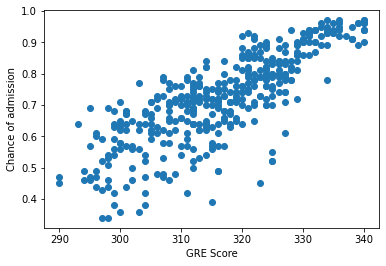

In [27]:
# Generate scatterplot to visualise relationship between GRE Score and Chance of Admit

plt.scatter(x=df["GRE Score"], y=df["Chance of Admit "])
plt.xlabel("GRE Score")
plt.ylabel("Chance of admission")
plt.show()

In [28]:
# Pearson correlation coefficient

from scipy.stats import pearsonr

corr_grescore_admit = pearsonr(df["GRE Score"], df["Chance of Admit "])
print(corr_grescore_admit)

(0.8026104595903503, 2.4581124141787826e-91)


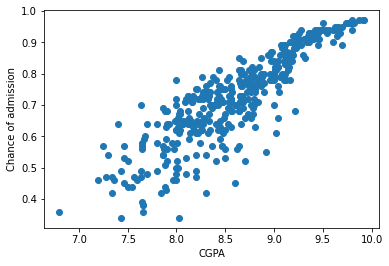

In [29]:
plt.scatter(x=df["CGPA"], y=df["Chance of Admit "])
plt.xlabel("CGPA")
plt.ylabel("Chance of admission")
plt.show()

In [30]:
corr_cgpa_admit = pearsonr(df["CGPA"], df["Chance of Admit "])
print(corr_cgpa_admit)

(0.8732890993553002, 2.336514000497834e-126)


In [31]:
# Subset of data showing those with > 0.7 chance of admit

high_chance = df[df["Chance of Admit "] > 0.7]
high_chance.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,208.076596,323.204255,110.582979,3.638298,3.857447,3.853191,8.939574,0.757447,0.820426
std,109.586726,8.700672,4.963599,1.004808,0.809860,0.769852,0.444267,0.429542,0.079913
min,1.000000,300.000000,98.000000,1.000000,1.500000,1.500000,8.000000,0.000000,0.710000
25%,130.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.645000,1.000000,0.750000
50%,204.000000,324.000000,110.000000,4.000000,4.000000,4.000000,8.970000,1.000000,0.800000
75%,297.500000,329.000000,114.000000,4.000000,4.500000,4.500000,9.230000,1.000000,0.890000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [32]:
high_chance_describe = high_chance.describe()
high_chance_describe

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,208.076596,323.204255,110.582979,3.638298,3.857447,3.853191,8.939574,0.757447,0.820426
std,109.586726,8.700672,4.963599,1.004808,0.809860,0.769852,0.444267,0.429542,0.079913
min,1.000000,300.000000,98.000000,1.000000,1.500000,1.500000,8.000000,0.000000,0.710000
25%,130.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.645000,1.000000,0.750000
50%,204.000000,324.000000,110.000000,4.000000,4.000000,4.000000,8.970000,1.000000,0.800000
75%,297.500000,329.000000,114.000000,4.000000,4.500000,4.500000,9.230000,1.000000,0.890000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [33]:
# What scores should students aim for to get a high chance (> 0.7) of admission?

high_chance_describe_mean_scores = high_chance_describe.iloc[1:3, [1,2,6]]
high_chance_describe_mean_scores

,GRE Score,TOEFL Score,CGPA
mean,323.204255,110.582979,8.939574
std,8.700672,4.963599,0.444267


In [34]:
high_chance_research = high_chance["Research"].value_counts(normalize=True)
high_chance_research

1    0.757447
0    0.242553
Name: Research, dtype: float64